<a href="https://colab.research.google.com/github/vineetyadav/H-M_Persnalized_Fashion_Recommendation/blob/main/H%26M_Persnalized_Fashion_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

H&M Personalized Fashion Recommendation 

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 2.1 MB 4.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72858 sha256=c0cacef8ff481a121d9bea459bc66399a975fe2599ed4f02777823ed26765b37
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle


In [ ]:
! kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100% 28.7G/28.7G [03:18<00:00, 154MB/s]
100% 28.7G/28.7G [03:18<00:00, 155MB/s]


In [ ]:
!mkdir hnm
!cp h-and-m-personalized-fashion-recommendations.zip hnm
!cd hnm
!unzip h-and-m-personalized-fashion-recommendations.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/089/0890677001.jpg  
  inflating: images/089/0890677002.jpg  
  inflating: images/089/0890677004.jpg  
  inflating: images/089/0890683001.jpg  
  inflating: images/089/0890683002.jpg  
  inflating: images/089/0890684001.jpg  
  inflating: images/089/0890684002.jpg  
  inflating: images/089/0890686002.jpg  
  inflating: images/089/0890697001.jpg  
  inflating: images/089/0890697002.jpg  
  inflating: images/089/0890700001.jpg  
  inflating: images/089/0890717001.jpg  
  inflating: images/089/0890717002.jpg  
  inflating: images/089/0890717003.jpg  
  inflating: images/089/0890722001.jpg  
  inflating: images/089/0890722002.jpg  
  inflating: images/089/0890734001.jpg  
  inflating: images/089/0890734003.jpg  
  inflating: images/089/0890741001.jpg  
  inflating: images/089/0890745001.jpg  
  inflating: images/089/0890746001.jpg  
  inflating: images/089/0890766001.jpg  
  inflating: images/089/0890766002.jpg  
  infl

In [ ]:
sns.pie(x=)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os 


## install recommendation library 

In [ ]:
!pip install surprise 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 38.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630203 sha256=4df983ff6de2902314eb32b1884a4587a4be7781f6e836c211a03e273bf90b40
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
train_dataset = pd.read_csv("transactions_train.csv")
train_dataset.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
customer_dataset = pd.read_csv("customers.csv")
customer_dataset.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
article_dataset = pd.read_csv("articles.csv")
article_dataset.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
train_dataset.describe(include="all")

,t_dat,customer_id,article_id,price,sales_channel_id
count,31788324,31788324,3.178832e+07,3.178832e+07,3.178832e+07
unique,734,1362281,NaN,NaN,NaN
top,2019-09-28,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,NaN,NaN,NaN
freq,198622,1895,NaN,NaN,NaN
mean,NaN,NaN,6.962272e+08,2.782927e-02,1.704028e+00
std,NaN,NaN,1.334480e+08,1.918113e-02,4.564786e-01
min,NaN,NaN,1.087750e+08,1.694915e-05,1.000000e+00
25%,NaN,NaN,6.328030e+08,1.581356e-02,1.000000e+00
50%,NaN,NaN,7.145820e+08,2.540678e-02,2.000000e+00
75%,NaN,NaN,7.865240e+08,3.388136e-02,2.000000e+00


In [ ]:
article_dataset.describe(include="all")

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
count,1.055420e+05,105542.000000,105542,105542.000000,105542,105542,1.055420e+05,105542,105542.000000,105542,...,105542,105542,105542,105542.000000,105542,105542.000000,105542,105542.000000,105542,105126
unique,NaN,NaN,45875,NaN,131,19,NaN,30,NaN,50,...,250,10,10,NaN,5,NaN,56,NaN,21,43404
top,NaN,NaN,Dragonfly dress,NaN,Trousers,Garment Upper body,NaN,Solid,NaN,Black,...,Jersey,A,Ladieswear,NaN,Ladieswear,NaN,Womens Everyday Collection,NaN,Jersey Fancy,T-shirt in printed cotton jersey.
freq,NaN,NaN,98,NaN,11169,42741,NaN,49747,NaN,22670,...,4604,26001,26001,NaN,39737,NaN,7295,NaN,21445,159
mean,6.984246e+08,698424.563378,NaN,234.861875,NaN,NaN,1.009515e+06,NaN,32.233822,NaN,...,NaN,NaN,NaN,3.171534,NaN,42.664219,NaN,1010.438290,NaN,NaN
std,1.284624e+08,128462.384432,NaN,75.049308,NaN,NaN,2.241359e+04,NaN,28.086154,NaN,...,NaN,NaN,NaN,4.353234,NaN,23.260105,NaN,6.731023,NaN,NaN
min,1.087750e+08,108775.000000,NaN,-1.000000,NaN,NaN,-1.000000e+00,NaN,-1.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,2.000000,NaN,1001.000000,NaN,NaN
25%,6.169925e+08,616992.500000,NaN,252.000000,NaN,NaN,1.010008e+06,NaN,9.000000,NaN,...,NaN,NaN,NaN,1.000000,NaN,20.000000,NaN,1005.000000,NaN,NaN
50%,7.022130e+08,702213.000000,NaN,259.000000,NaN,NaN,1.010016e+06,NaN,14.000000,NaN,...,NaN,NaN,NaN,2.000000,NaN,46.000000,NaN,1009.000000,NaN,NaN
75%,7.967030e+08,796703.000000,NaN,272.000000,NaN,NaN,1.010016e+06,NaN,52.000000,NaN,...,NaN,NaN,NaN,4.000000,NaN,61.000000,NaN,1017.000000,NaN,NaN


In [ ]:
customer_dataset.describe(include="all")

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
count,1371980,476930.0,464404.0,1365918,1355971,1.356119e+06,1371980
unique,1371980,NaN,NaN,3,4,NaN,352899
top,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
freq,1,NaN,NaN,1272491,877711,NaN,120303
mean,NaN,1.0,1.0,NaN,NaN,3.638696e+01,NaN
std,NaN,0.0,0.0,NaN,NaN,1.431363e+01,NaN
min,NaN,1.0,1.0,NaN,NaN,1.600000e+01,NaN
25%,NaN,1.0,1.0,NaN,NaN,2.400000e+01,NaN
50%,NaN,1.0,1.0,NaN,NaN,3.200000e+01,NaN
75%,NaN,1.0,1.0,NaN,NaN,4.900000e+01,NaN


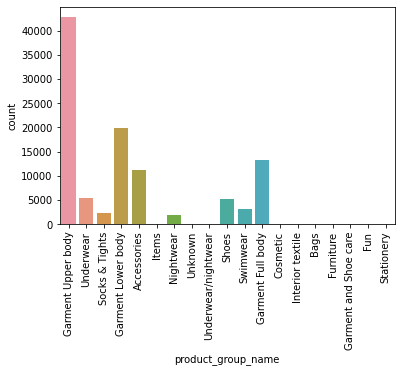

In [ ]:
import seaborn as sns 
import matplotlib as plt 
g = sns.countplot(data=article_dataset,x="product_group_name")
g.tick_params(axis='x', rotation=90)


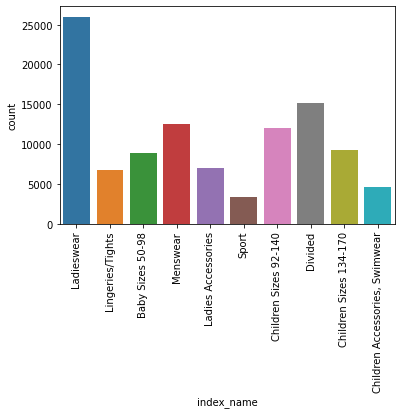

In [ ]:
g = sns.countplot(data=article_dataset,x="index_name")
g.tick_params(axis='x', rotation=90)

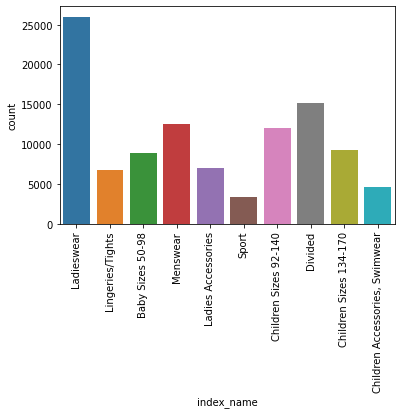

In [ ]:
g = sns.countplot(data=article_dataset,x="index_name")
g.tick_params(axis='x', rotation=90)

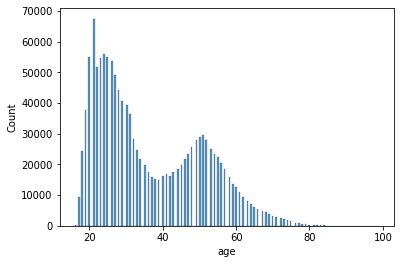

In [ ]:
g = sns.histplot(data=customer_dataset,x="age")


In [ ]:
from surprise import NMF
from surprise import svd

ImportError: ignored

In [ ]:
customer_dataset["Active"].fillna(0,inplace=True)
customer_dataset.head()


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


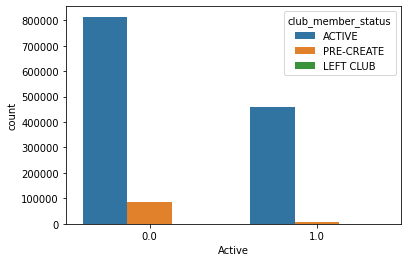

In [ ]:
sns.countplot(x="Active",data=customer_dataset,hue="club_member_status")

In [ ]:
sample_submission = pd.read_csv("sample_submission.csv")
print(sample_submission.head())
sample_submission.columns

                                         customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   

                                          prediction  
0  0706016001 0706016002 0372860001 0610776002 07...  
1  0706016001 0706016002 0372860001 0610776002 07...  
2  0706016001 0706016002 0372860001 0610776002 07...  
3  0706016001 0706016002 0372860001 0610776002 07...  
4  0706016001 0706016002 0372860001 0610776002 07...  


Index(['customer_id', 'prediction'], dtype='object')

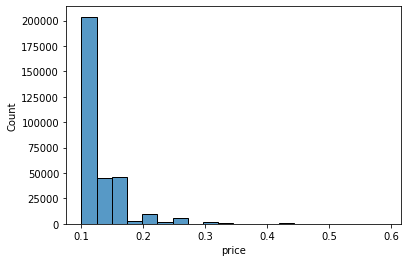

In [ ]:
price_data = train_dataset[train_dataset["price"]>0.1]
sns.histplot(x="price",data=price_data,bins=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


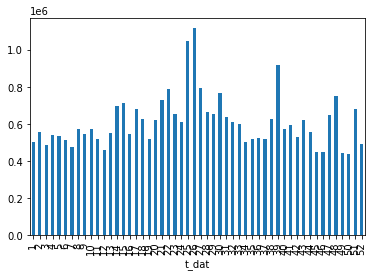

In [36]:
import pandas as pd
train_dataset["t_dat"] = train_dataset["t_dat"].astype("datetime64")
train_dataset.groupby(train_dataset["t_dat"].dt.week).count()["t_dat"].plot(kind="bar")



In [ ]:
counter_dataset = pd.DataFrame(train_dataset["article_id"])
threshold_check = train_dataset.groupby("article_id").size().max()
counter_dataset["Count"] = counter_dataset["article_id"].map(train_dataset.groupby("article_id").size())



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install scikit-surprise

In [ ]:
from surprise import Reader

In [ ]:
print(len(train_dataset["article_id"].unique()))
print(len(article_dataset["article_id"].unique()))

104547
105542


In [ ]:
from surprise import AlgoBase 
from surprise.model_selection import cross_validate
from surprise import PredictionImpossible 

In [ ]:
class MyOwnAglorithm(AlgoBase):
  def __init__(self,sim_options={},bsl_options={}):
    AlgoBase.__init__(self,sim_options=sim_options,bsl_options=bsl_options)

  def fit(self,trainset):
    AlgoBase.fit(self,trainset)

    #Compute baselines and similarities
    self.bu,self.bi = self.compute_baselines()
    self.sim = self.compute_similarities()

    return self
  
  def estimate(self,u , i):
    if not(self.trainset.knows_user(u) and self.trainset.knows_item(i)):
      raise PredictionImpossible("User and/or item unknown. ")

      #Compute similarities between u and v where v describes
      #users that have also rated i 
      neighbours = [(v,self.sim[u,v]) for (v,r) in self.trainset.ir[i]]
      #sort these neighbours by similarity 
      neighbours = sorted(neighbours, key=lambda x:x[1],reverse=True)

      print(" The 3 nearest neighbours of user",str(u),"are")
      for v,sim_uv in neighbours[:3]:
        print('user{0:} with sim {1:1.2f})'.format(v,sim_uv)
      
      #...Aaaand return the baseline estimate anyway
      bsl = self.trainset.global_mean+self.bu[u]+self.bi[u]
      return bsl
data = Dataset.load_builtin('m1-100k')
algo = MyownAlgorithm 

cross_validate(algo,data,verbose=True)



SyntaxError: ignored